Integrantes:

* Arthur Macedo 

* Rafael Pereira

* Raissa Pedrosa

* Rodrigo Carvalho

In [133]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [134]:
dataset = pd.read_csv("houses_to_rent_v2.csv", sep = ";")
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [135]:
colunas = ["Cidade", "Área", "Quartos","Banheiros", "Vagas", "Andar", "Animais Aceitos", "Mobiliado", "Condomínio",
          "Valor do Aluguel", "Valor do IPTU", "Seguro Incêndio", "Total" ]

dataset.columns = colunas

In [136]:
dataset.isnull()

,Cidade,Área,Quartos,Banheiros,Vagas,Andar,Animais Aceitos,Mobiliado,Condomínio,Valor do Aluguel,Valor do IPTU,Seguro Incêndio,Total
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,False,False,False,False,False,False,False,False,False,False,False,False,False
10688,False,False,False,False,False,False,False,False,False,False,False,False,False
10689,False,False,False,False,False,False,False,False,False,False,False,False,False
10690,False,False,False,False,False,False,False,False,False,False,False,False,False


In [137]:
dataset["Animais Aceitos"].replace("acept", True, inplace= True)
dataset["Mobiliado"].replace("furnished", True, inplace= True)
dataset["Mobiliado"].replace("not furnished", False, inplace= True)
dataset["Animais Aceitos"].replace("not acept", False, inplace= True)
dataset["Andar"].replace("-", 0, inplace = True)

In [138]:
dataset.dtypes

Cidade              object
Área                 int64
Quartos              int64
Banheiros            int64
Vagas                int64
Andar               object
Animais Aceitos       bool
Mobiliado             bool
Condomínio           int64
Valor do Aluguel     int64
Valor do IPTU        int64
Seguro Incêndio      int64
Total                int64
dtype: object

In [139]:
dataset["Andar"] = dataset["Andar"].astype(np.int64)

In [140]:
dataset.dtypes

Cidade              object
Área                 int64
Quartos              int64
Banheiros            int64
Vagas                int64
Andar                int64
Animais Aceitos       bool
Mobiliado             bool
Condomínio           int64
Valor do Aluguel     int64
Valor do IPTU        int64
Seguro Incêndio      int64
Total                int64
dtype: object

In [141]:
dataset["Apartamento"] = dataset["Andar"] >= 1

In [142]:
dataset

,Cidade,Área,Quartos,Banheiros,Vagas,Andar,Animais Aceitos,Mobiliado,Condomínio,Valor do Aluguel,Valor do IPTU,Seguro Incêndio,Total,Apartamento
0,São Paulo,70,2,1,1,7,True,True,2065,3300,211,42,5618,True
1,São Paulo,320,4,4,0,20,True,False,1200,4960,1750,63,7973,True
2,Porto Alegre,80,1,1,1,6,True,False,1000,2800,0,41,3841,True
3,Porto Alegre,51,2,1,0,2,True,False,270,1112,22,17,1421,True
4,São Paulo,25,1,1,0,1,False,False,0,800,25,11,836,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,False,True,402,1478,24,22,1926,True
10688,São Paulo,285,4,4,4,17,True,False,3100,15000,973,191,19260,True
10689,Rio de Janeiro,70,3,3,0,8,False,True,980,6000,332,78,7390,True
10690,Rio de Janeiro,120,2,2,2,8,True,True,1585,12000,279,155,14020,True


In [143]:
dataset["Valor do aluguel por m2"] = dataset["Total"] / dataset["Área"]

In [144]:
for column in ["Área","Quartos","Banheiros","Vagas","Andar","Condomínio","Valor do Aluguel","Valor do IPTU","Seguro Incêndio"]:
  Q1 = dataset[column].quantile(0.25)
  Q3 = dataset[column].quantile(0.75)
  IQR = Q3 - Q1
  limite_inf = Q1 - 1.5 * IQR
  limite_sup = Q3 + 1.5 * IQR
  dataset = dataset[(dataset[column] >= limite_inf) & (dataset[column] <= limite_sup)]

C:\Users\morte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


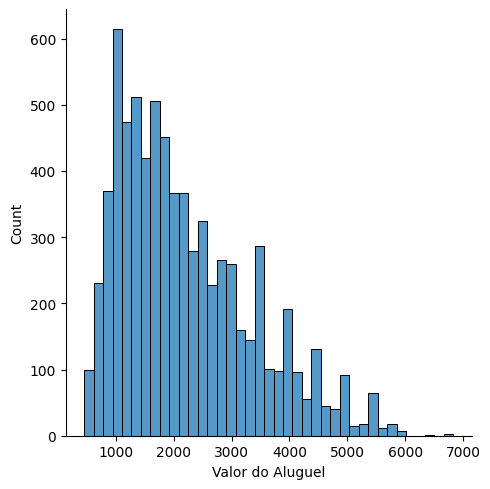

In [145]:
sns.displot(dataset, x="Valor do Aluguel")

In [146]:
dataset.groupby("Cidade").mean()

,Área,Quartos,Banheiros,Vagas,Andar,Animais Aceitos,Mobiliado,Condomínio,Valor do Aluguel,Valor do IPTU,Seguro Incêndio,Total,Apartamento,Valor do aluguel por m2
Cidade,,,,,,,,,,,,,,
Belo Horizonte,99.915730,2.524719,1.767416,1.325843,3.452809,0.705618,0.124719,410.198876,1919.987640,128.625843,26.783146,2485.932584,0.841573,28.994232
Campinas,87.183424,2.131793,1.589674,1.182065,4.489130,0.800272,0.131793,539.077446,1662.751359,88.531250,22.202446,2312.562500,0.823370,29.268848
Porto Alegre,77.324012,1.937319,1.497589,0.804243,3.925747,0.831244,0.253616,420.586307,1746.502411,71.214079,26.424301,2264.727097,0.891996,32.807572
Rio de Janeiro,76.956307,1.995878,1.485573,0.543281,5.063479,0.797197,0.245672,785.620775,2227.784007,126.466612,29.104699,3168.976092,0.938994,46.514897
São Paulo,82.677624,2.004325,1.639273,1.038639,4.909170,0.721165,0.241349,604.814014,2515.133795,112.526817,33.260957,3266.013841,0.753172,49.123569


<Axes: xlabel='Cidade', ylabel='Valor do aluguel por m2'>

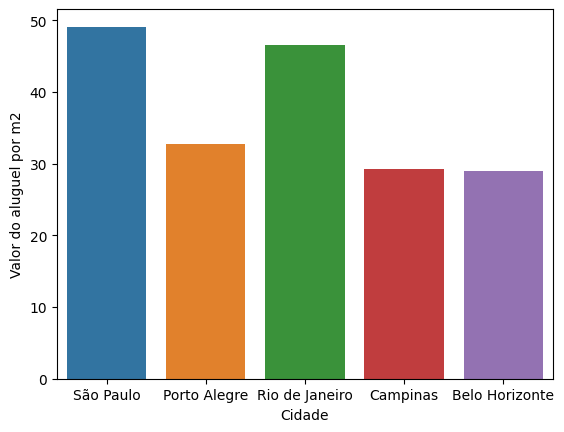

In [147]:
sns.barplot(data = dataset, x = "Cidade", y = "Valor do aluguel por m2", errorbar=None)

<Axes: xlabel='Valor do aluguel por m2', ylabel='Cidade'>

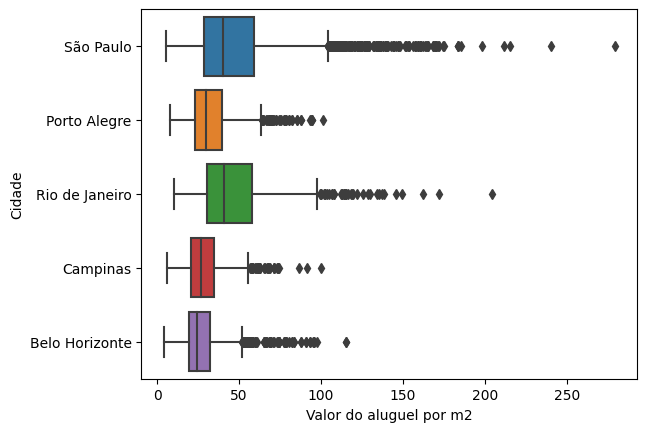

In [148]:
sns.boxplot(data = dataset, x = "Valor do aluguel por m2", y = "Cidade")

In [149]:
from scipy import stats

In [150]:
dataset_valor = dataset[["Cidade", "Condomínio", "Valor do Aluguel", "Valor do IPTU", "Seguro Incêndio", "Total"]]

In [151]:
dataset_valor_campinas = dataset_valor[dataset_valor["Cidade"] == "Campinas"]
dataset_valor_campinas

,Cidade,Condomínio,Valor do Aluguel,Valor do IPTU,Seguro Incêndio,Total
11,Campinas,550,580,43,8,1181
28,Campinas,0,3180,100,48,3328
48,Campinas,2200,1700,256,22,4178
49,Campinas,505,1600,59,21,2185
57,Campinas,663,5500,133,70,6366
...,...,...,...,...,...,...
10614,Campinas,800,1030,84,14,1928
10625,Campinas,780,1700,167,22,2669
10629,Campinas,800,3700,234,47,4781
10656,Campinas,1462,5200,284,66,7012


In [152]:
stat, p_valor = stats.shapiro(dataset_valor_campinas['Total'])

alpha = 0.05

print(f"Estatística de teste: {stat:.4f}")
print(f"P-valor: {p_valor:.4f}")

if p_valor > alpha:
    print("Resultado: Não rejeitamos a hipótese nula (os dados seguem uma distribuição normal)")
else:
    print("Resultado: Rejeitamos a hipótese nula (os dados não seguem uma distribuição normal)")


Estatística de teste: 0.8639
P-valor: 0.0000
Resultado: Rejeitamos a hipótese nula (os dados não seguem uma distribuição normal)


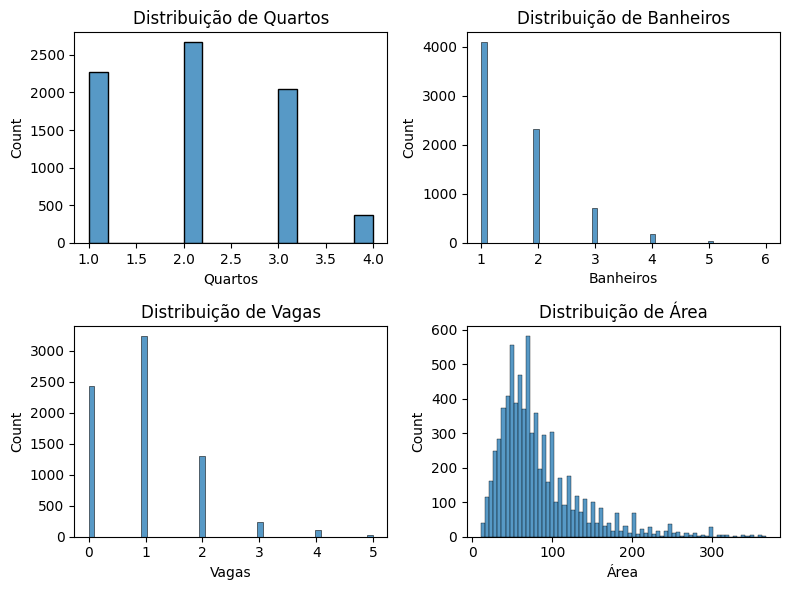

In [153]:
dataset_quant = dataset[['Quartos', 'Banheiros', 'Vagas', 'Área']]

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

sns.histplot(data=dataset_quant, x="Quartos", ax=axs[0, 0])
axs[0, 0].set_title('Distribuição de Quartos')

sns.histplot(data=dataset_quant, x='Banheiros', ax=axs[0, 1])
axs[0, 1].set_title('Distribuição de Banheiros')

sns.histplot(data=dataset_quant, x='Vagas', ax=axs[1, 0])
axs[1, 0].set_title('Distribuição de Vagas')

sns.histplot(data=dataset_quant, x='Área', ax=axs[1, 1])
axs[1, 1].set_title('Distribuição de Área')

plt.tight_layout()
plt.show()


In [154]:
stat, p_valor = stats.shapiro(dataset_quant['Quartos'])

alpha = 0.05

print(f"Estatística de teste: {stat:.4f}")
print(f"P-valor: {p_valor:.4f}")

if p_valor > alpha:
    print("Resultado: Não rejeitamos a hipótese nula (os dados seguem uma distribuição normal)")
else:
    print("Resultado: Rejeitamos a hipótese nula (os dados não seguem uma distribuição normal)")


Estatística de teste: 0.8528
P-valor: 0.0000
Resultado: Rejeitamos a hipótese nula (os dados não seguem uma distribuição normal)


C:\Users\morte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [155]:
stat, p_valor = stats.shapiro(dataset_quant['Área'])

alpha = 0.05

print(f"Estatística de teste: {stat:.4f}")
print(f"P-valor: {p_valor:.4f}")

if p_valor > alpha:
    print("Resultado: Não rejeitamos a hipótese nula (os dados seguem uma distribuição normal)")
else:
    print("Resultado: Rejeitamos a hipótese nula (os dados não seguem uma distribuição normal)")

Estatística de teste: 0.8383
P-valor: 0.0000
Resultado: Rejeitamos a hipótese nula (os dados não seguem uma distribuição normal)


In [156]:
stat, p_valor = stats.shapiro(dataset_quant['Vagas'])

alpha = 0.05

print(f"Estatística de teste: {stat:.4f}")
print(f"P-valor: {p_valor:.4f}")

if p_valor > alpha:
    print("Resultado: Não rejeitamos a hipótese nula (os dados seguem uma distribuição normal)")
else:
    print("Resultado: Rejeitamos a hipótese nula (os dados não seguem uma distribuição normal)")

Estatística de teste: 0.8213
P-valor: 0.0000
Resultado: Rejeitamos a hipótese nula (os dados não seguem uma distribuição normal)


In [157]:
stat, p_valor = stats.shapiro(dataset_quant['Banheiros'])

alpha = 0.05

print(f"Estatística de teste: {stat:.4f}")
print(f"P-valor: {p_valor:.4f}")

if p_valor > alpha:
    print("Resultado: Não rejeitamos a hipótese nula (os dados seguem uma distribuição normal)")
else:
    print("Resultado: Rejeitamos a hipótese nula (os dados não seguem uma distribuição normal)")

Estatística de teste: 0.7310
P-valor: 0.0000
Resultado: Rejeitamos a hipótese nula (os dados não seguem uma distribuição normal)


In [158]:
corr_quant = dataset.drop(columns= ["Cidade", "Total", "Condomínio", "Valor do Aluguel", "Seguro Incêndio", "Valor do IPTU",
 "Animais Aceitos", "Mobiliado", "Apartamento", "Andar", "Valor do aluguel por m2"]).corr()

In [159]:
dataset_valor.drop(columns= ["Cidade", "Total"], inplace= True)
corr_valor = dataset_valor.corr()
corr_valor

C:\Users\morte\AppData\Local\Temp\ipykernel_11644\3402642761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_valor.drop(columns= ["Cidade", "Total"], inplace= True)


,Condomínio,Valor do Aluguel,Valor do IPTU,Seguro Incêndio
Condomínio,1.000000,0.443133,0.480537,0.350038
Valor do Aluguel,0.443133,1.000000,0.511805,0.972250
Valor do IPTU,0.480537,0.511805,1.000000,0.509284
Seguro Incêndio,0.350038,0.972250,0.509284,1.000000


<Axes: >

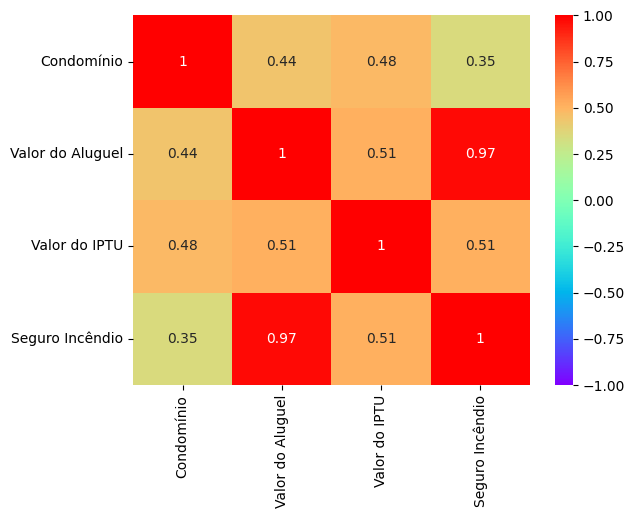

In [160]:
sns.heatmap(corr_valor, vmin=-1, vmax=1, annot=True, cmap="rainbow")

In [161]:
desvio_padrao = (dataset["Seguro Incêndio"] / dataset["Valor do Aluguel"]).std()
print(desvio_padrao)

0.0015201587999800147


#### Como o desvio padrão está próximo de zero, significa que o valor do seguro incêndio é proporcional ao valor do aluguel

<Axes: >

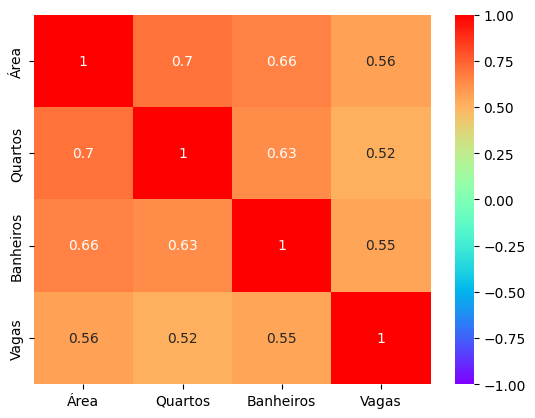

In [162]:
sns.heatmap(corr_quant, vmin=-1, vmax=1, annot=True, cmap="rainbow")

In [163]:
df = dataset.copy()

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = df.drop(columns=['Valor do Aluguel','Cidade','Valor do aluguel por m2','Total'])
y = df['Valor do Aluguel']

# Criar o modelo de regressão linear usando os dados de treinamento
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calcular métricas de desempenho
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Criar um DataFrame para mostrar as métricas
metrics_df = pd.DataFrame({'MSE': [mse], 'R2 Score': [r2]})
display(metrics_df)


,MSE,R2 Score
0,42623.154881,0.966139


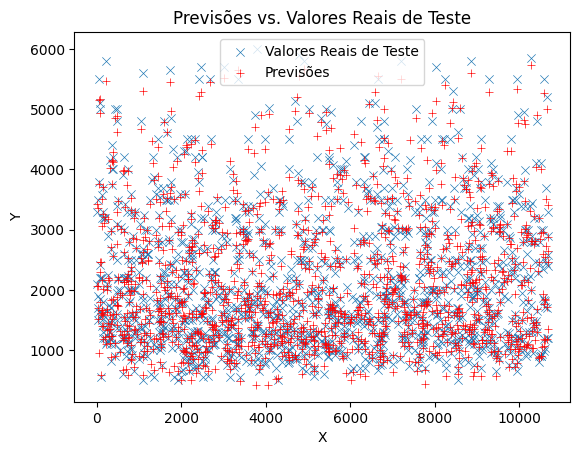

In [165]:
# Plotar os valores reais de teste
sns.scatterplot(x=x_test.index, y=y_test, label='Valores Reais de Teste',marker='x')

# Plotar as previsões
sns.scatterplot(x=x_test.index, y=y_pred, color='red', label='Previsões',marker='+')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Previsões vs. Valores Reais de Teste')
plt.legend()
plt.show()

In [166]:
x_test.index

Index([ 8072,  8051,   678, 10475,  3934,  4339,  7859,  7233,  2767,  3729,
       ...
        6874,  5131,  7922,  4839,  4628,  3095,  1035,  5857,  6988,  6179],
      dtype='int64', length=1469)